# EVN

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# 단어 긍정(2), 중립(1), 부정(0) 분류 프로젝트

## 데이터

In [2]:
# 입력 문장
sentences = [
    '나는 오늘 기분이 좋아',
    '나는 오늘 우울해'
]

# 출력 정답
labels = [[1, 1, 1, 2],
          [1, 1, 0]]  # 긍정(2), 중립(1), 부정(0)

# 정답 dic
id_to_label = {0: '부정', 1: '중립', 2: '긍정'}

## Vocabulary

In [3]:
#문장 띄어쓰기 단위 분할
words = []
for sentence in sentences:
  print(sentence.split())
  words.extend(sentence.split())
words

['나는', '오늘', '기분이', '좋아']
['나는', '오늘', '우울해']


['나는', '오늘', '기분이', '좋아', '나는', '오늘', '우울해']

In [5]:
#중복 단어 제거
words = list(dict.fromkeys(words))
words

['나는', '오늘', '기분이', '좋아', '우울해']

In [7]:
#각 단어별 고유 번호 부여
word_to_id =  { '[PAD]' : 0, '[UNK]' : 1 }#
for word in words:
  word_to_id[word] = len(word_to_id)
word_to_id

{'[PAD]': 0, '[UNK]': 1, '기분이': 4, '나는': 2, '오늘': 3, '우울해': 6, '좋아': 5}

In [9]:
id_to_word = {_id : word for word, _id in word_to_id.items()}
id_to_word

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '오늘', 4: '기분이', 5: '좋아', 6: '우울해'}

## 모델 학습용 데이터 생성

In [11]:
#train_inputs = 입력, train_labels = 출력(label), 결과값
train_inputs = []
for sentence in sentences:
  train_inputs.append([word_to_id[word] for word in sentence.split()])
train_inputs

[[2, 3, 4, 5], [2, 3, 6]]

In [12]:
#문장 길이 0 추가해서 동일하게 만듬
for row in train_inputs:
  row += [0] * (4 - len(row))
train_inputs

[[1, 1, 1, 2], [1, 1, 0]]

In [27]:
train_inputs = np.array(train_inputs)
train_inputs

array([[2, 3, 4, 5],
       [2, 3, 6, 0]])

In [24]:
train_labels = labels
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [25]:
#문장 길이 1 추가해서 동일하게 만듬 -> 중립  1 부정 0 긍정 2
for row in train_labels:
  row += [1] * (4 - len(row))
train_labels

[[1, 1, 1, 2], [1, 1, 0, 1]]

In [26]:
train_labels = np.array(train_labels)
train_labels

array([[1, 1, 1, 2],
       [1, 1, 0, 1]])

## 모델링

In [33]:
#word to vector
embedding = tf.keras.layers.Embedding(len(word_to_id), 8) # n_vocab (vector 차원수), d_model = 8 (vector 개수)
hidden = embedding(train_inputs)
train_inputs.shape, hidden #기존 (2, 4) -> vector change to (2, 4, 8) 

((2, 4), <tf.Tensor: shape=(2, 4, 8), dtype=float32, numpy=
 array([[[-3.8842894e-02, -3.2223620e-02, -1.3240028e-02,  6.7290068e-03,
          -6.2720068e-03,  7.3659904e-03,  2.6954282e-02,  3.0864213e-02],
         [ 4.1780163e-02, -4.7161818e-02, -1.8968916e-02,  7.8938715e-03,
          -6.0106888e-03,  2.8931204e-02,  4.7258735e-03,  9.0219863e-03],
         [ 1.4494631e-02,  1.3162438e-02,  1.0885499e-02, -4.5241274e-02,
          -4.6496764e-03,  3.4093592e-02,  1.2889504e-06, -4.7711063e-02],
         [-3.3372298e-02, -1.4999427e-02, -2.5555063e-02, -3.3876784e-03,
           4.6535995e-02,  1.0333251e-02, -4.1280761e-03, -2.4926890e-02]],
 
        [[-3.8842894e-02, -3.2223620e-02, -1.3240028e-02,  6.7290068e-03,
          -6.2720068e-03,  7.3659904e-03,  2.6954282e-02,  3.0864213e-02],
         [ 4.1780163e-02, -4.7161818e-02, -1.8968916e-02,  7.8938715e-03,
          -6.0106888e-03,  2.8931204e-02,  4.7258735e-03,  9.0219863e-03],
         [-1.3954997e-02, -1.1704683e-02, -

### 1 (softmax 이용) = 2 + 3+ 4 (softmax 구현)

In [34]:
#긍정, 부정 확률 예측 모델링 - softmax 이용 1
linear = tf.keras.layers.Dense(3, activation = tf.nn.softmax)
outputs = linear(hidden)
outputs #각 33프로정도 되는 것 

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[0.332533  , 0.34919056, 0.31827638],
        [0.34854144, 0.32119596, 0.33026263],
        [0.34306672, 0.31698257, 0.33995065],
        [0.33198747, 0.33837354, 0.32963893]],

       [[0.332533  , 0.34919056, 0.31827638],
        [0.34854144, 0.32119596, 0.33026263],
        [0.32834587, 0.3448033 , 0.3268508 ],
        [0.3302268 , 0.34137106, 0.3284022 ]]], dtype=float32)>

In [35]:
#긍정, 부정 확률 예측 모델링 - softmax 구현 2
linear_2 = tf.keras.layers.Dense(3)
out= linear_2(hidden)
out #확률 랜덤

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[-0.05670268,  0.01788733,  0.00582045],
        [ 0.00748066, -0.02154624, -0.06537468],
        [ 0.06931257, -0.06123363, -0.0214838 ],
        [ 0.02445893, -0.00490987,  0.03501271]],

       [[-0.05670268,  0.01788733,  0.00582045],
        [ 0.00748066, -0.02154624, -0.06537468],
        [-0.01773236,  0.05209615,  0.00754122],
        [-0.03254183,  0.03093284,  0.00907868]]], dtype=float32)>

In [37]:
#softmax 계산 위한 준비  3 
numerator = np.exp(out)
denominator = np.sum(numerator, axis = 2, keepdims = True)
numerator, denominator

(array([[[0.944875  , 1.0180483 , 1.0058374 ],
         [1.0075088 , 0.97868425, 0.93671644],
         [1.0717711 , 0.9406035 , 0.9787453 ],
         [1.0247606 , 0.9951022 , 1.035633  ]],
 
        [[0.944875  , 1.0180483 , 1.0058374 ],
         [1.0075088 , 0.97868425, 0.93671644],
         [0.98242396, 1.053477  , 1.0075697 ],
         [0.967982  , 1.0314163 , 1.00912   ]]], dtype=float32),
 array([[[2.9687607],
         [2.9229093],
         [2.9911199],
         [3.0554957]],
 
        [[2.9687607],
         [2.9229093],
         [3.0434709],
         [3.0085182]]], dtype=float32))

In [38]:
#softmax 계산 결과 4
probs = numerator / denominator
probs

array([[[0.31827253, 0.3429203 , 0.33880717],
        [0.3446938 , 0.33483225, 0.320474  ],
        [0.35831767, 0.31446534, 0.327217  ],
        [0.33538276, 0.3256762 , 0.33894107]],

       [[0.31827253, 0.3429203 , 0.33880717],
        [0.3446938 , 0.33483225, 0.320474  ],
        [0.32279724, 0.3461433 , 0.33105943],
        [0.3217471 , 0.342832  , 0.33542094]]], dtype=float32)

In [41]:
#dense의 갸중치, 편향 구하기
weight, bias = linear_2.get_weights()
weight, bias

(array([[ 0.5906016 , -0.40533096, -0.7222328 ],
        [ 0.35396606, -0.04985321,  0.26376015],
        [-0.04703903, -0.11754119,  0.04301077],
        [-0.3792579 ,  0.17702389,  0.35988623],
        [ 0.5946707 , -0.08594984,  0.25680166],
        [ 0.37381834, -0.46628588, -0.68169624],
        [-0.01440346, -0.6925597 ,  0.2860816 ],
        [-0.6176162 ,  0.6270123 , -0.5399511 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

In [61]:
#y = wx + b 계산
logits = np.matmul(hidden, weight) + bias
logits

array([[[-0.05670268,  0.01788734,  0.00582045],
        [ 0.00748066, -0.02154624, -0.06537468],
        [ 0.06931257, -0.06123363, -0.0214838 ],
        [ 0.02445893, -0.00490987,  0.03501271]],

       [[-0.05670268,  0.01788734,  0.00582045],
        [ 0.00748066, -0.02154624, -0.06537468],
        [-0.01773236,  0.05209615,  0.00754122],
        [-0.03254183,  0.03093284,  0.00907868]]], dtype=float32)

In [62]:
#word to vector
embedding = tf.keras.layers.Embedding(len(word_to_id), 8) # n_vocab (vector 차원수), d_model = 8 (vector 개수)
hidden = embedding(train_inputs)
train_inputs.shape, hidden #기존 (2, 4) -> vector change to (2, 4, 8) 


def build_model(n_vocab, d_model, n_seq, n_out): # n_vocab = 단어수, d_model = 단어 의미 벡터 차원수, n_seq : 문장길이(단어 수) = 4, n_out = 예측할 class 수 = 3
  inputs = tf.keras.layers.Input((n_seq, ))
  embedding = tf.keras.layers.Embedding(n_vocab, d_model)
  hidden = embedding(inputs)
  linear = tf.keras.layers.Dense(n_out, activation = tf.nn.softmax)
  outputs = linear(hidden)
  model = tf.keras.Model(inputs = inputs, outputs = outputs)
  return model

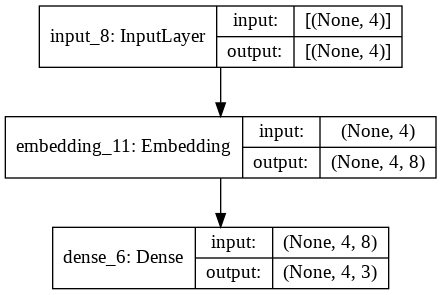

In [63]:
model = build_model(len(word_to_id), 8, 4, 3)
tf.keras.utils.plot_model(model, 'model.png', show_shapes = True)

In [65]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 4, 8)              56        
_________________________________________________________________
dense_6 (Dense)              (None, 4, 3)              27        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


## 학습

In [67]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [68]:
history = model.fit(train_inputs, train_labels, epochs = 100, batch_size = 16)

Epoch 1/100
1/1 [==============================] - 1s 727ms/step - loss: 1.0971 - accuracy: 0.1250
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1.0947 - accuracy: 0.1250
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.0923 - accuracy: 0.1250
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0899 - accuracy: 0.1250
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0875 - accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0851 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0827 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0803 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0779 - accuracy: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1.0755 - accuracy: 0.7500
Epoch 11/100
1/1 [=========

## 평가

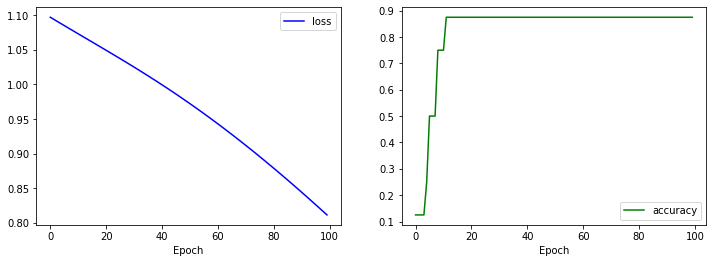

In [69]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [70]:
model.evaluate(train_inputs, train_labels)

1/1 [==============================] - 0s 161ms/step - loss: 0.8076 - accuracy: 0.8750


[0.8075730800628662, 0.875]

## 예측

In [71]:
string = '나는 기분이 우울해'

In [72]:
#incoding
infer_input = [word_to_id[word] for word in string.split()]
infer_input

[2, 4, 6]

In [73]:
#padding
infer_input += [0] * (4 - len(infer_input))
infer_input

[2, 4, 6, 0]

In [75]:
infer_inputs = np.array([infer_input])
infer_inputs

array([[2, 4, 6, 0]])

In [76]:
#infer 
y_preds = model.predict(infer_inputs)
y_preds

array([[[0.2446426 , 0.46600893, 0.2893485 ],
        [0.23682131, 0.4724526 , 0.29072604],
        [0.40500388, 0.32131246, 0.27368367],
        [0.2592577 , 0.46034747, 0.28039488]]], dtype=float32)

In [77]:
#확률의 max 값을 추론 값으로 결정
y_pred_class = np.argmax(y_preds, axis = 2)
y_pred_class

array([[1, 1, 0, 1]])